In [89]:
import matplotlib.pyplot as plt
import matplotlib.collections
import pandas as pd 
import numpy as np
np.set_printoptions(threshold=np.inf)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv
from scipy.optimize import minimize

In [4]:
File_name = 'normalized_clean_data_white.csv'
#File_name = 'normalized_clean_data_red.csv'

### read the data

In [7]:
data = pd.read_csv(File_name)
X = data.drop(['quality'], axis=1)
y = data['quality']
data.head()

,'fixed acidity','volatile acidity','citric acid','residual sugar',chlorides,'free sulfur dioxide','total sulfur dioxide',density,pH,sulphates,alcohol,quality
0,1.455196,-0.525745,0.163197,-0.723341,-0.484164,-0.910375,0.436437,-0.087172,-1.277146,0.714535,-0.235002,4
1,-1.248030,-0.117342,-2.019296,0.688769,-0.784726,-0.080958,0.311793,0.705468,0.479272,-0.342648,-1.043260,6
2,1.424328,2.107497,0.247944,0.114549,2.006807,0.331171,1.098048,1.233523,0.144109,-0.475154,-1.301681,3
3,-3.550898,0.215523,-3.219267,1.258169,-0.435887,-0.700318,-0.348040,-0.355738,3.853709,-0.342648,1.184051,6
4,-1.357690,0.326478,-0.619329,-0.290598,-0.784726,0.910017,-0.324475,-1.445819,-0.382286,0.928363,1.644874,8


### split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Question 1.a - Regrestion
we'll try out three regresion models and compair them.
1. linear regrestion
2. SVM Regresor
3. neural network regresor

# Linear Regrestion

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


reg = LinearRegression().fit(X_train, y_train)
print('r2 score = ', reg.score(X_test, y_test))

a=reg.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print('train_rmse =', train_rmse)
b=reg.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print('test_rmse =', test_rmse)

r2 score =  0.4985980338549063
train_rmse = 1.4220728184022033
test_rmse = 1.434904171398302


In [10]:
reg.coef_

array([ 0.65346711, -0.3263034 , -0.08977271,  1.09475636, -0.37399227,
        0.45754833,  0.17431843, -1.43614705,  0.44273065,  0.21682793,
        0.21673427])

In [11]:
# polinomial regresion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


p_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

p_reg = p_reg.fit(X_train, y_train)
p_reg.named_steps['linear'].coef_

array([ 5.93432092e+00,  6.61982810e-01, -3.69140026e-01, -2.83788730e-03,
        1.04993924e+00, -3.88547578e-01,  5.25240175e-01,  1.65475508e-01,
       -1.46421982e+00,  3.34816143e-01,  3.83198327e-01,  7.08224996e-02,
        2.98664404e-01, -2.36398314e-01,  1.82582504e-01,  2.54731399e-01,
       -5.31393775e-01,  1.92368407e-01,  1.60134029e-01, -5.12322769e-01,
        5.30388493e-01,  1.23439640e-01, -3.67235334e-01,  5.21902314e-02,
        4.16465672e-02, -2.18023360e-01, -1.34558929e-02, -1.27609868e-01,
        2.23796614e-01,  1.42901241e-01, -4.20436793e-02, -1.69143660e-02,
        8.49758109e-02, -8.55004080e-03,  2.07929643e-01,  1.07859025e-02,
        5.22406075e-02,  6.08613809e-02, -4.31790661e-01,  4.74017576e-02,
        1.15850134e-01, -1.30031647e-01, -5.25364108e-01, -8.85842320e-01,
        2.30611705e-01, -2.40904453e-02,  9.36224111e-01,  7.06631567e-02,
       -1.61263301e-01,  1.42178914e-01,  1.06347860e-02,  1.47338446e-01,
       -1.28406655e-01,  

In [14]:
from sklearn.metrics import mean_squared_error
print ('r2 score = ', p_reg.score(X_test, y_test))
a = p_reg.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('train_rmse =', train_rmse)
b=  p_reg.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('test_rmse =', test_rmse)

r2 score =  0.7063775531300647
train_rmse = 1.0935385267930102
test_rmse = 1.0980560485492854


# SVM Regresor

In [98]:
from sklearn import svm
regr_rbf = svm.SVR(kernel='rbf')
regr_lin = svm.SVR(kernel='linear')
regr_poly =svm.SVR(kernel='poly', degree = 2)
regr_rbf.fit(X_train, y_train)
regr_lin.fit(X_train, y_train)
regr_poly.fit(X_train, y_train)

SVR(degree=2, kernel='poly')

In [99]:
print('regr_rbf score = ',regr_rbf.score(X_train,y_train))
a = regr_rbf.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_rbf train_rmse = ',train_rmse)
b=  regr_rbf.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_rbf test_rmse = ', test_rmse, '\n')

print('regr_lin score = ',regr_lin.score(X_train,y_train))
a = regr_lin.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_lin train_rmse = ',train_rmse)
b=  regr_lin.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_lin test_rmse = ', test_rmse,'\n')

print('regr_poly score = ',regr_poly.score(X_train,y_train))
a = regr_poly.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_poly train_rmse = ',train_rmse)
b=  regr_poly.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_poly test_rmse = ', test_rmse)

regr_rbf score =  0.8950689067600488
regr_rbf train_rmse =  0.6457027346584532
regr_rbf test_rmse =  0.6903354327400097 

regr_lin score =  0.4507250301343102
regr_lin train_rmse =  1.4773229050273038
regr_lin test_rmse =  1.4922539101283414 

regr_poly score =  0.35679801078952567
regr_poly train_rmse =  1.5986530343539926
regr_poly test_rmse =  1.598609458428582


# Deep Neural Network Regresor 

In [100]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.models import Model
import tensorflow as tf

In [101]:
DNN_model = Sequential()
DNN_model.add(Dense(100, input_dim=11, activation= "selu"))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(128, activation= "selu"))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(128, activation= "selu"))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(2, activation= "selu"))
DNN_model.add(Dense(1))

In [102]:
DNN_model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
history = DNN_model.fit(X_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 15.9536 - mean_squared_error: 15.9536 - val_loss: 8.7176 - val_mean_squared_error: 8.7176
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 7.6688 - mean_squared_error: 7.6688 - val_loss: 5.7501 - val_mean_squared_error: 5.7501
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 5.4259 - mean_squared_error: 5.4259 - val_loss: 4.5498 - val_mean_squared_error: 4.5498
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 4.3220 - mean_squared_error: 4.3220 - val_loss: 5.0798 - val_mean_squared_error: 5.0798
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 3.9678 - mean_squared_error: 3.9678 - val_loss: 2.8462 - val_mean_squared_error: 2.8462
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 2.6937 - mean_squared_error: 2.6937 - val_loss: 2.0924 - val_mean_squared_error: 2.0924
Epoch 7/100
259/259 

Epoch 51/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5244 - mean_squared_error: 0.5244 - val_loss: 0.4540 - val_mean_squared_error: 0.4540
Epoch 52/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5299 - mean_squared_error: 0.5299 - val_loss: 0.4509 - val_mean_squared_error: 0.4509
Epoch 53/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5201 - mean_squared_error: 0.5201 - val_loss: 0.4355 - val_mean_squared_error: 0.4355
Epoch 54/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5266 - mean_squared_error: 0.5266 - val_loss: 0.4315 - val_mean_squared_error: 0.4315
Epoch 55/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5169 - mean_squared_error: 0.5169 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 56/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5529 - mean_squared_error: 0.5529 - val_loss: 0.4698 - val_mean_squared_error: 0.4698
Epoch 57/100
259

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


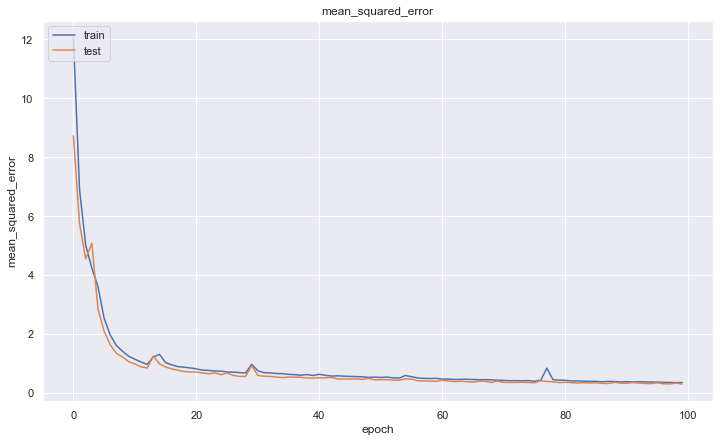

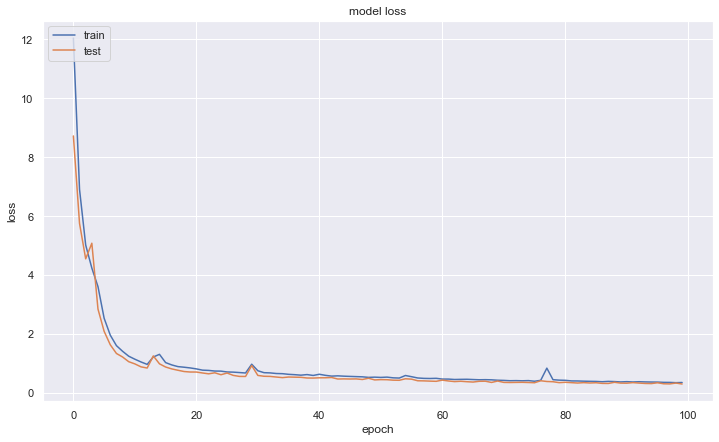

In [103]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize = (12,7))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (12,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
a = DNN_model.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('NN train_rmse = ',train_rmse)
b=  DNN_model.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('NN test_rmse = ', test_rmse)

NN train_rmse =  0.5095015717564888
NN test_rmse =  0.5532917438162412


# Clustering

# Demention Reduction

In [59]:
def printPrejections(reducted_df: pd.DataFrame):
    for i in range(0,2):
        for j in range(i+1,3):
            plotName = '(dim '+str(i)+'),(dim '+str(j)+')'
            dim1 = '(dim '+str(i)+')'
            dim2 = '(dim '+str(j)+')'
            vis = pd.DataFrame()
            vis[dim1] = reducted_df[i]
            vis[dim2] = reducted_df[j]
            vis['y'] = reducted_df['quality']
            plt.figure(figsize=(16,10))
            sns.scatterplot(
                x=dim1, y=dim2,
                hue="y",
                palette=sns.color_palette("hls", len(set(list(reducted_df['quality'])))),
                data=vis,
                legend="full",
                alpha=0.8
            ).set_title(plotName)
        

## pca

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.32614352 0.16303056 0.12950229]
[230.4026968  162.89872622 145.18505247]


In [61]:
pca_df = pd.DataFrame(pca.transform(X))
pca_df['quality'] = y


In [62]:
pca_df.head()

,0,1,2,quality
0,-0.065418,-1.390038,-0.558679,4
1,0.644000,1.193347,1.425941,6
2,2.540556,-0.907437,1.396851,3
3,-1.715174,4.238386,2.548548,6
4,-1.773661,1.609653,-0.094845,8


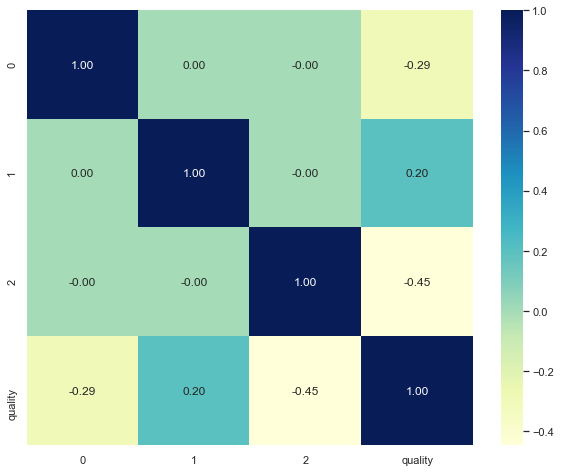

In [63]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = pca_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

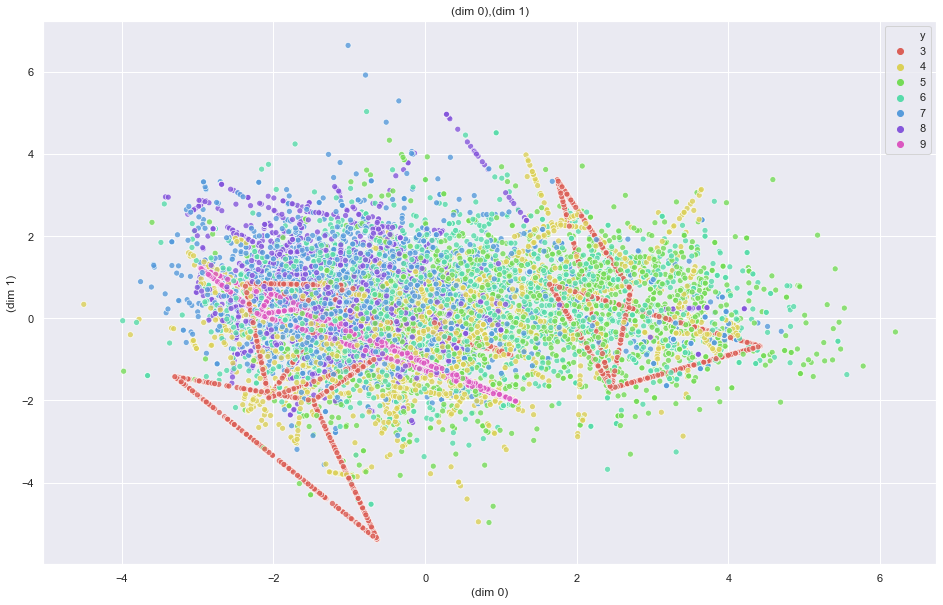

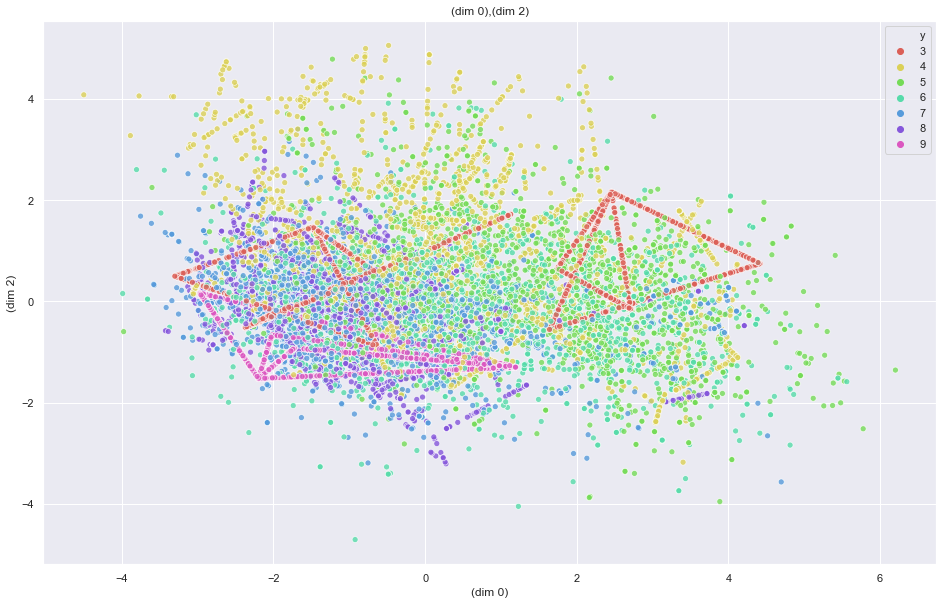

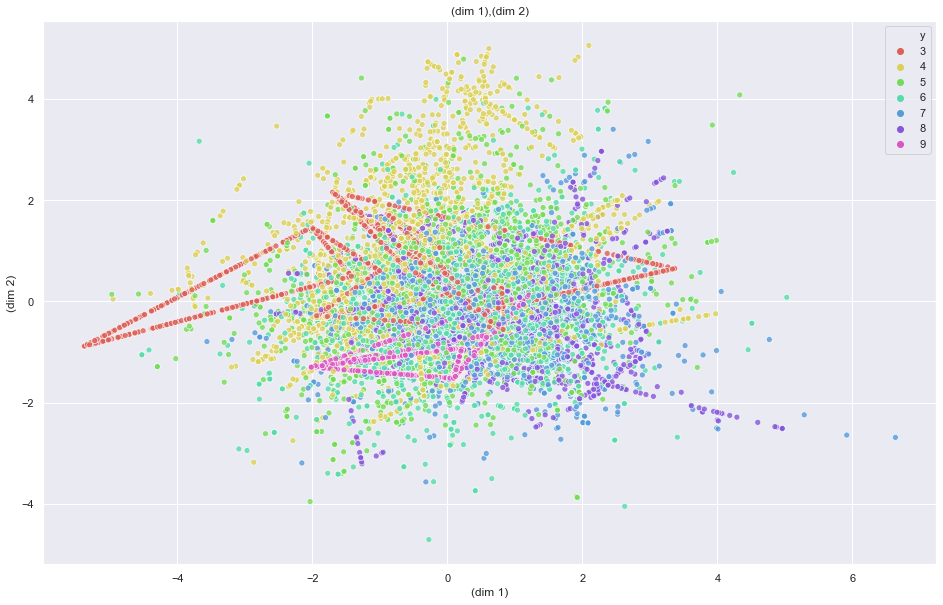

In [64]:
printPrejections(pca_df)

## Auto Encoder

In [66]:
input_dim = Input(shape = (11, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYERS
encoded1 = Dense(9, activation = 'selu')(input_dim)
encoded2 = Dense(6, activation = 'selu')(encoded1)
encoded3 = Dense(4, activation = 'selu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)
# DEFINE THE DECODER LAYERS
decoded1 = Dense(4, activation = 'selu')(encoded4)
decoded2 = Dense(6, activation = 'selu')(decoded1)
decoded3 = Dense(9, activation = 'selu')(decoded2)
decoded4 = Dense(11, activation = 'sigmoid')(decoded3)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 200, shuffle = True, validation_data = (X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out[0:2]

Epoch 1/100
60/60 [==============================] - 1s 3ms/step - loss: 0.7922 - val_loss: 0.8004
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7918 - val_loss: 0.7998
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7932 - val_loss: 0.7991
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7904 - val_loss: 0.7984
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7880 - val_loss: 0.7977
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7876 - val_loss: 0.7970
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7873 - val_loss: 0.7963
Epoch 8/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7881 - val_loss: 0.7955
Epoch 9/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7867 - val_loss: 0.7947
Epoch 10/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7857 - val_loss: 0.7939
Epoch 11/

60/60 [==============================] - 0s 2ms/step - loss: 0.7110 - val_loss: 0.7178
Epoch 84/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7119 - val_loss: 0.7167
Epoch 85/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7124 - val_loss: 0.7156
Epoch 86/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7106 - val_loss: 0.7145
Epoch 87/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7102 - val_loss: 0.7134
Epoch 88/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7077 - val_loss: 0.7123
Epoch 89/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7065 - val_loss: 0.7112
Epoch 90/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7061 - val_loss: 0.7101
Epoch 91/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7032 - val_loss: 0.7090
Epoch 92/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7039 - val_loss: 0.7079
Epoch 93/100


array([[0.       , 0.       , 1.0064553],
       [0.       , 0.       , 1.2282788]], dtype=float32)

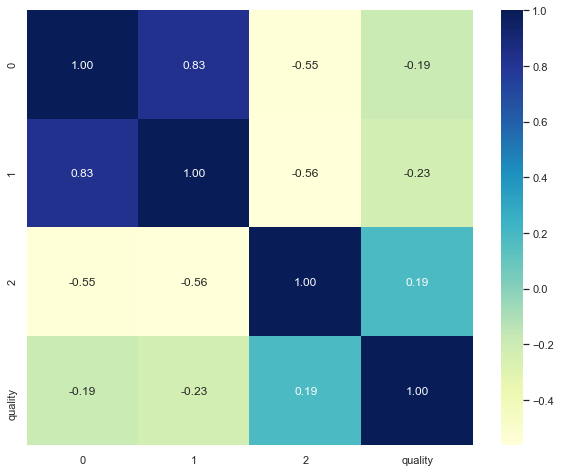

In [67]:
AE_data = pd.DataFrame(encoded_out)
AE_data['quality']=y_test.values
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = AE_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

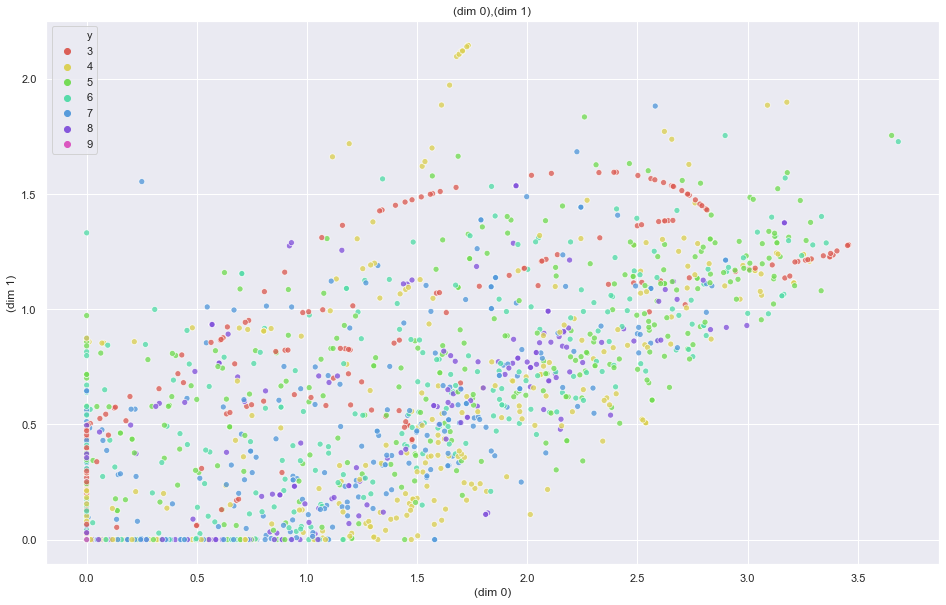

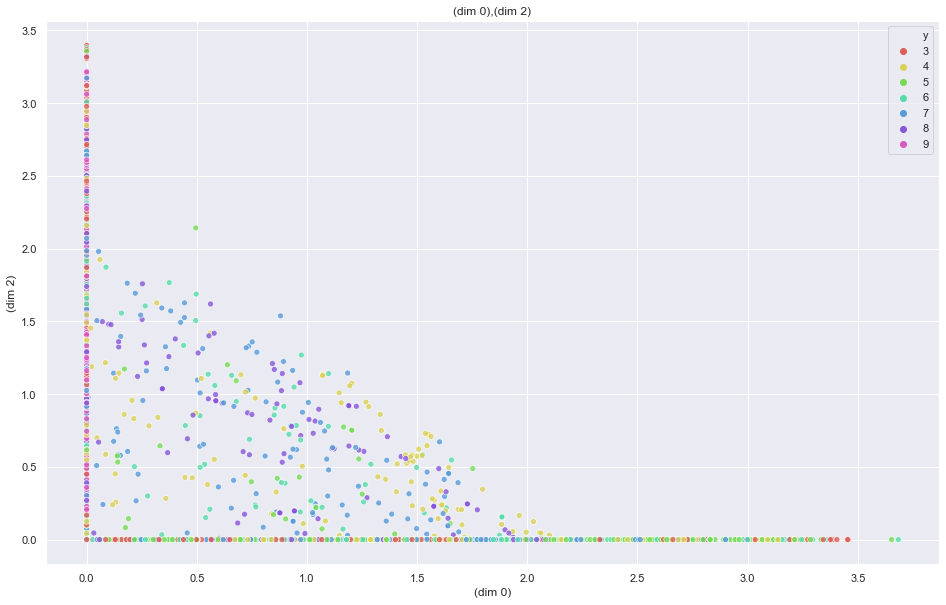

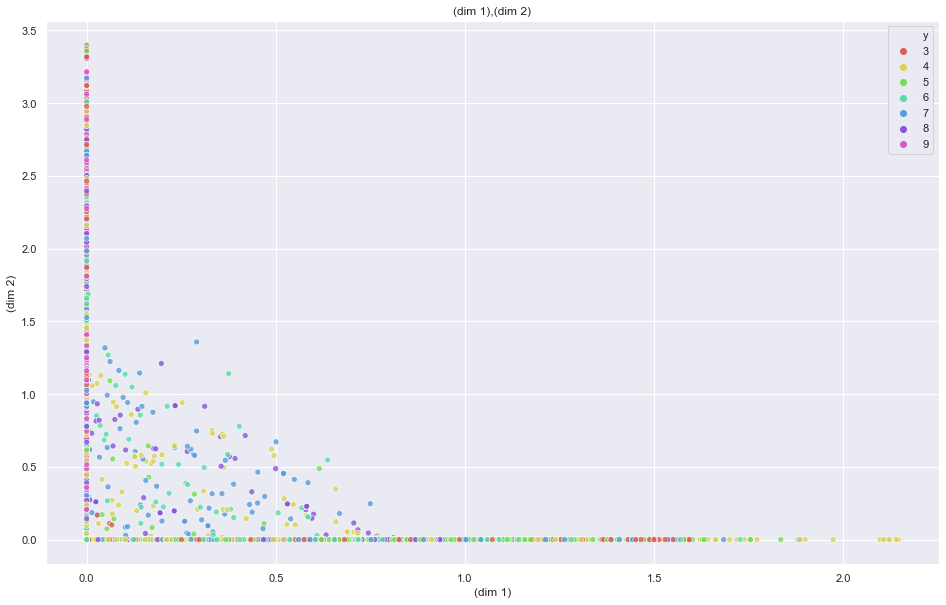

In [68]:
printPrejections(AE_data)

## LLE

In [69]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_transformed = embedding.fit_transform((X - X.mean())/X.std())
X_transformed.shape

(14798, 3)

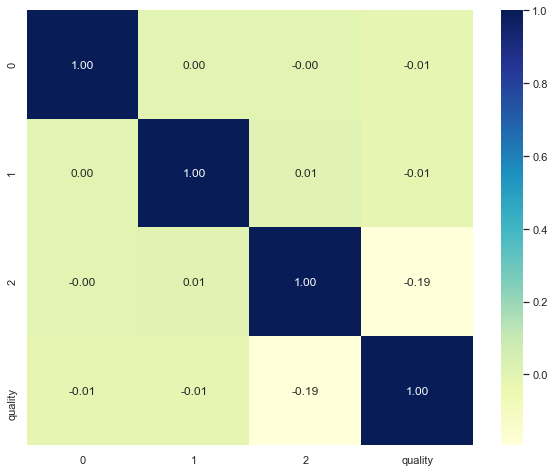

In [70]:
LLE_data = pd.DataFrame(X_transformed)
LLE_data['quality'] = y.values
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = LLE_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

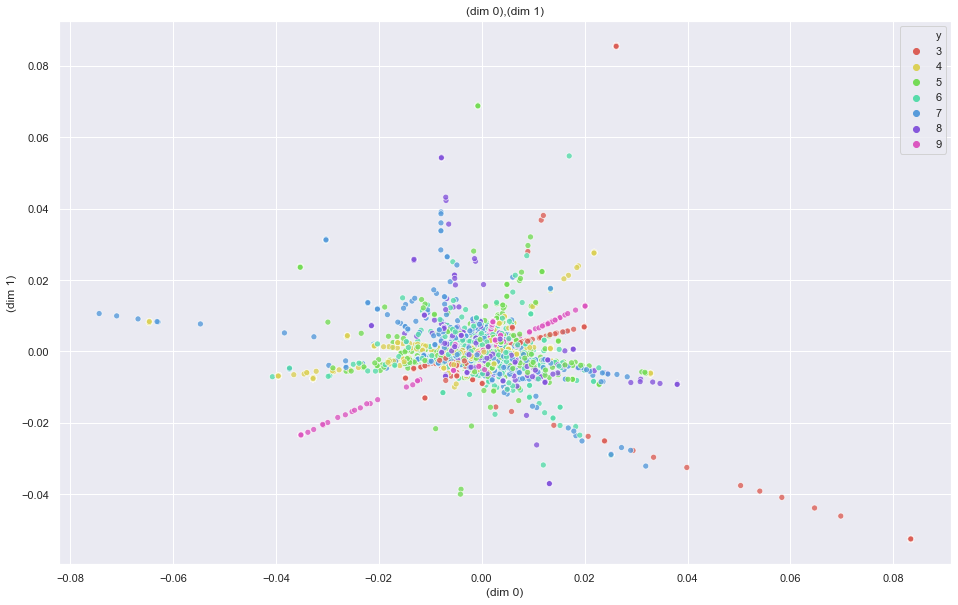

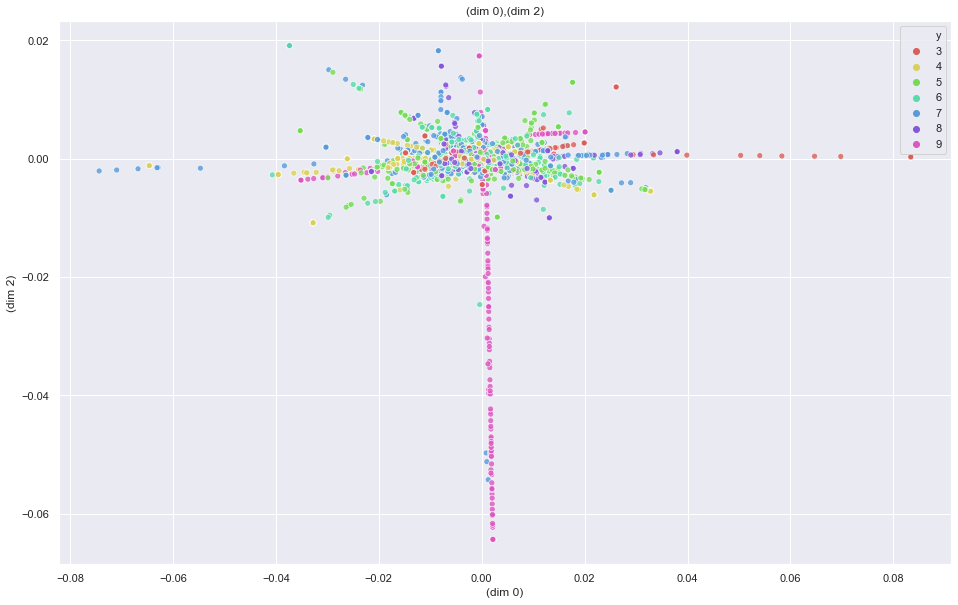

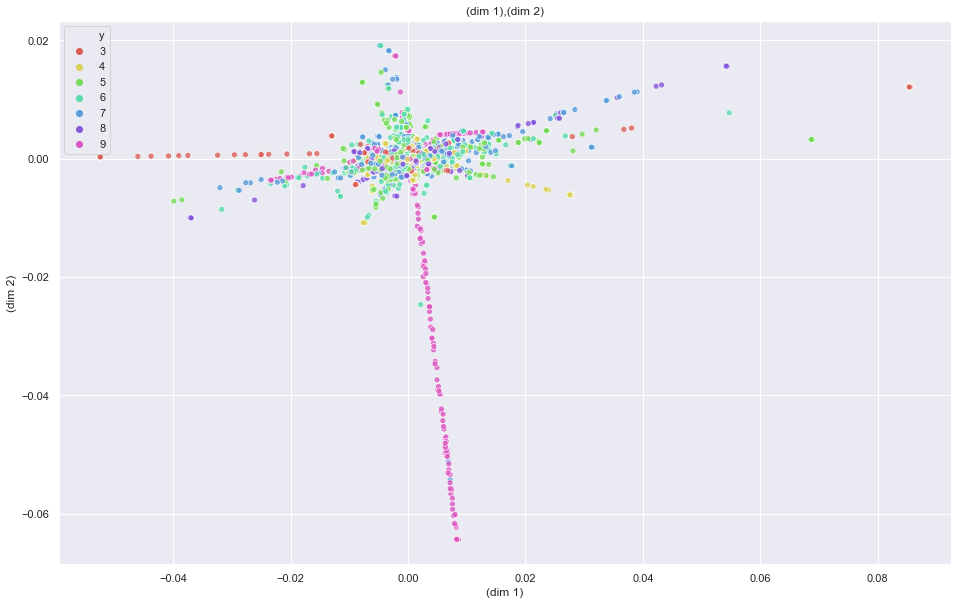

In [71]:
printPrejections(LLE_data)

# Linear Models Compereson

In [72]:
import statsmodels.api as sm
from statsmodels.regression import linear_model
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [74]:
print(results.t_test(np.identity(12)))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             6.0000      0.012    512.147      0.000       5.977       6.023
c1             0.6501      0.022     29.048      0.000       0.606       0.694
c2            -0.3345      0.012    -26.783      0.000      -0.359      -0.310
c3            -0.0904      0.014     -6.654      0.000      -0.117      -0.064
c4             1.0896      0.044     24.770      0.000       1.003       1.176
c5            -0.3749      0.017    -21.589      0.000      -0.409      -0.341
c6             0.4525      0.017     27.114      0.000       0.420       0.485
c7             0.1877      0.019      9.784      0.000       0.150       0.225
c8            -1.4223      0.078    -18.133      0.000      -1.576      -1.269
c9             0.4375      0.018     23.973      0.0

In [75]:
df = pd.DataFrame({'a':[4,5,6],'b':[7,8,9],'c':[10,11,12]})

In [76]:
s = pd.Series([2,2,1])
t = pd.Series([4,6,8])

In [77]:
for col in df.columns:
    df[('s*'+col)]=df[col]*s

In [81]:
data

,'fixed acidity','volatile acidity','citric acid','residual sugar',chlorides,'free sulfur dioxide','total sulfur dioxide',density,pH,sulphates,alcohol,quality
0,1.455196,-0.525745,0.163197,-0.723341,-0.484164,-0.910375,0.436437,-0.087172,-1.277146,0.714535,-0.235002,4
1,-1.248030,-0.117342,-2.019296,0.688769,-0.784726,-0.080958,0.311793,0.705468,0.479272,-0.342648,-1.043260,6
2,1.424328,2.107497,0.247944,0.114549,2.006807,0.331171,1.098048,1.233523,0.144109,-0.475154,-1.301681,3
3,-3.550898,0.215523,-3.219267,1.258169,-0.435887,-0.700318,-0.348040,-0.355738,3.853709,-0.342648,1.184051,6
4,-1.357690,0.326478,-0.619329,-0.290598,-0.784726,0.910017,-0.324475,-1.445819,-0.382286,0.928363,1.644874,8
...,...,...,...,...,...,...,...,...,...,...,...,...
14793,0.304232,-0.498669,0.546735,-0.801617,-0.847377,-0.196999,0.068554,-1.077791,0.661239,-0.116765,1.347369,9
14794,0.364947,-0.539624,0.306820,-0.810024,-0.863472,-0.242722,0.181631,-1.061137,0.541986,-0.008502,1.290671,9
14795,-1.689887,0.064812,-1.069971,-0.801129,2.897544,1.089369,0.873142,0.458220,0.539259,0.564990,-1.643931,4
14796,-1.298469,-0.535644,2.026603,1.227961,1.156744,2.185996,0.969989,0.540700,0.167900,1.593925,-0.352025,7


In [79]:
df = sm.add_constant(df)
model = linear_model.OLS(t,df)
results = model.fit()

In [80]:
results.summary()

C:\Users\Netanelg\AppData\Roaming\Python\Python37\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\Netanelg\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Netanelg\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
c:\program files\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\program files\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                nan
Time:                        22:30:55   Log-Likelihood:                 95.988
No. Observations:                   3   AIC:                            -186.0
Df Residuals:                       0   BIC:                            -188.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0854        inf         -0        nan         nan         nan
a              0.6125        inf          0        nan         nan         nan
b              0.3564        inf          0        nan         nan         nan
c              0.1002        inf          0        nan         nan         nan
s*a            0.8533        inf          0        nan         nan         nan
s*b            0.1551        inf          0        nan         nan         nan
s*c           -0.5430        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.111
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                           0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         57.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

# World's Best Grape !

In [117]:
def CustumLossFunction(x: list):
    X_df = pd.DataFrame([x],columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
                                                    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
                                                    'density', 'pH', 'sulphates', 'alcohol'])
    return abs(10-regr_rbf.predict(X_df)[0])

In [118]:
methoods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr']

In [119]:
min_error = 100
best_methood = ''
x0 = list(data[data.quality==9].mean().to_frame().T.drop(['quality'],axis=1).values[0])
for m in methoods:
    res = minimize(CustumLossFunction, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun<min_error:
        best_methood=m
        min_error=res.fun

In [120]:
print(best_methood)
print(min_error)
res = minimize(CustumLossFunction, x0, method=best_methood, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ',regr_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN score: ',DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ',regr_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ',regr_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regresion score: ',reg.predict(pd.Series(res.x).to_frame().T)[0])

Powell
3.659295089164516e-13
best grape SVR_rbf score:  9.999999999999634
best grape DNN score:  8.967419
best grape SVR_lin score:  8.86586410723502
best grape SVR_poly score:  9.292121963584965
best grape Linear regresion score:  8.233067775187415


In [121]:
res.x

array([ 1.61161494, -0.12685121,  0.72754663, -0.20182246, -0.9510603 ,
       -0.01447425, -0.22441778, -0.4748163 ,  0.60681555, -0.15846887,
        0.89726353])

In [110]:
def CustumLossFunction(x: list):
    X_df = pd.DataFrame([x],columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
                                                    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
                                                    'density', 'pH', 'sulphates', 'alcohol'])
    return abs(10-DNN_model.predict(X_df)[0][0])

In [111]:
min_error = 100
best_methood = ''
x0 = list(data[data.quality==9].mean().to_frame().T.drop(['quality'],axis=1).values[0])
for m in methoods:
    res = minimize(CustumLossFunction, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun<min_error:
        best_methood=m
        min_error=res.fun

In [115]:
print(best_methood)
print(min_error)
res = minimize(CustumLossFunction, x0, method=best_methood, tol=1e-6, options={'maxiter': 10000})
print('best grape SVR_rbf score: ',regr_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape DNN score: ',DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape SVR_lin score: ',regr_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape SVR_poly score: ',regr_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape Linear regresion score: ', reg.predict(pd.Series(res.x).to_frame().T)[0])

Powell
1.0294513702392578
best grape SVR_rbf score:  7.618637965827093
best grape DNN score:  8.970549
best grape SVR_lin score:  12.973838429959429
best grape SVR_poly score:  20.423046379065696
best grape Linear regresion score:  11.333466586536868


In [116]:
res.x

array([ 2.44977379, -0.45013789,  3.91031884,  0.89519786, -1.72012271,
        1.35738064,  0.36107244, -1.07946919,  0.55619559,  0.20653376,
       -0.99685833])